<center>

<h1>Introduction to</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Julia_prog_language.svg/1280px-Julia_prog_language.svg.png" width=300>
</center>

- Josh Day
- GitHub: `@joshday`
- Email: `josh@juliacomputing.com`
- Slides: https://github.com/joshday/Talks


# Trying Out Julia

Go to [www.juliabox.com](www.juliabox.com)

- Sign in with Google/GitHub credentials
- Click New -> Julia 0.6.2

# Motivation

- Do we need another language?
- Let's start with Sapir-Worf Hypothesis

# Sapir-Worf Hypothesis

- Your language influences/determines how you think

**How you solve problems is influenced by your tools**

- i.e. with R, avoid loops 

# The Two-Language Problem

- Write your prototype in an easy language (R)
- Write your final version in a fast language (C++)

# Julia

I claim that:

- Julia is less controlling over how you solve problems
- Julia solves the two-language problem

# What is Julia?
> Julia is a high-level, high-performance dynamic programming language for technical computing, with syntax that is familiar to users of other technical computing environments

- Julia is more than just "Fast R"
    - Performance comes from features that work well together.  
    - You can't just take the magic dust that makes Julia fast and sprinkle it on [language of choice]

# Benchmarks

<center><img src="benchmarks.png" width=900></center>

# Julia is Just-In-Time Compiled

- The first time a function is run, Julia compiles it

In [1]:
y = rand(10^6)

@time sum(y)

@time sum(y)

  0.032580 seconds (10.36 k allocations: 578.102 KiB)
  0.000648 seconds (5 allocations: 176 bytes)


500409.3658755267

# Generic Code Gets Specialized

- Julia specializes on **types of arguments**

In [2]:
f(x) = x + 4

@time f(1.0)
@time f(1.0)

  0.001789 seconds (287 allocations: 18.414 KiB)
  0.000001 seconds (5 allocations: 176 bytes)


5.0

In [29]:
@time f(1)
@time f(1)

  0.002229 seconds (154 allocations: 9.933 KiB)
  0.000001 seconds (4 allocations: 160 bytes)


5

# Most of Julia is Written in Julia

- Easy to find out what's going on inside a function 
    - `@edit`
- Also most Julia packages are 100% Julia
    - Tensorflow:
    ![](tensorflow.png)
    - Flux.jl
    ![](flux.png)

# Julia Makes Use of Metaprogramming

- Code that writes code
- Can do everything a function can do plus much more

In [5]:
@code_native f(1)

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[2]
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 1
	leaq	4(%rdi), %rax
	popq	%rbp
	retq
	nopw	(%rax,%rax)


# Julia Has a Great Type System

In [5]:
rand(2, 2)

2×2 Array{Float64,2}:
 0.988638  0.364771
 0.495774  0.846367

In [6]:
typeof(1.0)

Float64

In [7]:
typeof(1)

Int64

# Types Define Sets of Things

In [33]:
supertype(Float64)

AbstractFloat

In [34]:
supertype(AbstractFloat)

Real

In [35]:
supertype(Real)

Number

In [36]:
supertype(Number)

Any

# Programs are Organized Around Multiple Dispatch

In [6]:
f(x::Array) = 1
f(x) = 2

f (generic function with 2 methods)

In [7]:
f([1, 2])

1

In [9]:
f("asdf")

2

# Quintessential R vs. Julia

- Consider R's `pnorm`, `dnorm`, `qnorm`, etc. family of functions

In [12]:
using Distributions
d = Normal(0, 1)

Distributions.Normal{Float64}(μ=0.0, σ=1.0)

In [12]:
pdf(d, 0)

0.3989422804014327

In [13]:
cdf(d, 0)

0.5

# Why is Multiple Dispatch Useful?

In [13]:
function my_quantile(d, q)
    θ = mean(d)
    for i in 1:20
        θ -= (cdf(d, θ) - q) / pdf(d, θ)
    end
    θ
end

my_quantile (generic function with 1 method)

In [14]:
my_quantile(Normal(), .5)

0.0

In [16]:
my_quantile(Gamma(5, 1), .3)

3.6336090829638032

# Julia's Growth (Number of Packages)

![](https://pkg.julialang.org/img/allver.svg)

# Julia's Growth (GitHub Stars)

![](https://pkg.julialang.org/img/stars.svg)

# Naming Conventions in Julia

- `@` denotes a macro
    - `@time`, `@edit`, `@inbounds`
- Function ending in `!` is *mutating*, as in at least one argument is changed in place
    - `BLAS.syrk!`, `StatsBase.zscore!`
- Types begin with a capital letter 
    - `Array`, `Float64`, `Float32`
- Dot-notation does *broadcasting*
    - `abs(1)`, `abs.([1,2])`

# Interop (R)

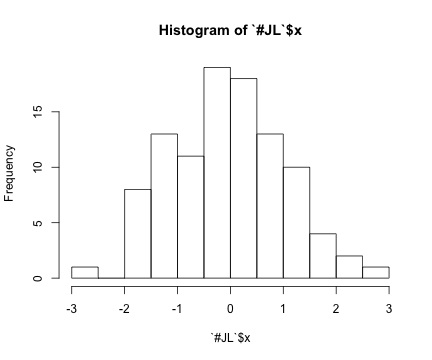

RCall.RObject{RCall.VecSxp}
$breaks
 [1] -3.0 -2.5 -2.0 -1.5 -1.0 -0.5  0.0  0.5  1.0  1.5  2.0  2.5  3.0

$counts
 [1]  1  0  8 13 11 19 18 13 10  4  2  1

$density
 [1] 0.02 0.00 0.16 0.26 0.22 0.38 0.36 0.26 0.20 0.08 0.04 0.02

$mids
 [1] -2.75 -2.25 -1.75 -1.25 -0.75 -0.25  0.25  0.75  1.25  1.75  2.25  2.75

$xname
[1] "`#JL`$x"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


In [17]:
using RCall

x = randn(100)

R"hist($x)"

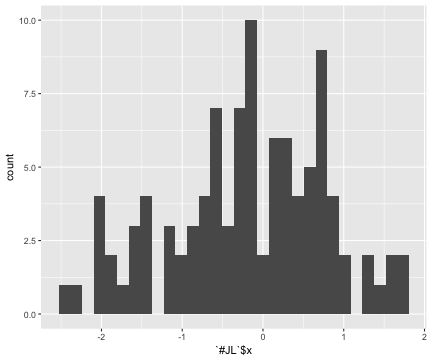

RCall.RObject{RCall.VecSxp}


In [21]:
R"library(ggplot2); qplot($x)"

# Interop (Python)

In [19]:
using PyCall

@pyimport numpy.random as nr

nr.rand(3, 4)

3×4 Array{Float64,2}:
 0.0398643  0.607592  0.684177  0.833166
 0.530636   0.163035  0.329293  0.604761
 0.143053   0.378553  0.9444    0.837416